# 颜色距离

In [17]:
import scipy.ndimage as ndimage
import scipy.stats.stats as sss  #for auto white balance
import scipy.cluster.vq as scv
import scipy.linalg as nla  # for linear algebra / least squares
import math # math... who does that
import copy # for deep copy
import scipy.spatial.distance as spsd
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
src = cv2.cvtColor(cv2.imread('../datas/green-1.jpg'),cv2.COLOR_BGR2RGB)
backgroud = cv2.cvtColor(cv2.imread('../datas/desktop.jpg'),cv2.COLOR_BGR2RGB)

In [21]:
def color_distance(img,color):
    shape = img.shape
    pixels = img.reshape(-1, 3)
    distances = spsd.cdist(pixels, [color])
    distances = spsd.cdist(pixels, [color]) #calculate the distance each pixel is
    distances *= (255.0/distances.max()) #normalize to 0 - 255
    dst = np.clip(distances,0,255)
    return np.uint8(dst).reshape((shape[0],shape[1]))

In [54]:
bgcolor = src[10,10]
dst = color_distance(src,bgcolor)
_,mask = cv2.threshold(dst,50,255,cv2.THRESH_BINARY_INV)
foregroundr = src[:,:,0] - mask
foregroundg = src[:,:,1] - mask
foregroundb = src[:,:,2] - mask
foreground = dst - mask#cv2.merge([foregroundr,foregroundg,foregroundb])
foreground[foreground < 0] = 0

# backgroudr = backgroud[:,:,0]  + mask
# backgroudg = backgroud[:,:,1] + mask
# backgroudb = backgroud[:,:,2] + mask
# background = cv2.merge([backgroudr,backgroudg,backgroudb])
# combined = backgroud.astype(np.float32) + foreground.astype(np.float32)
# combined = np.clip(combined,0,255).astype(np.uint8)

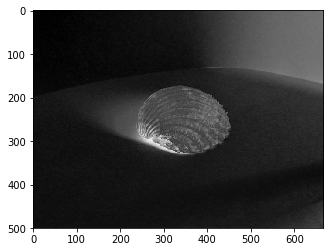

In [55]:
plt.imshow(foreground,'gray')